# Linear Regression with real life data

### Importing Libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Import Data

In [85]:
# Importing data from csv files
data = pd.read_csv("https://docs.google.com/spreadsheets/d/1jgiBQWYXdd5okREwM1sjK4sHiCWMAMe3ZoHxUOStzu0/export?gid=744062586&format=csv")
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


### Preprocessing Data

#### Exploring data descriptive statistics of the variables

In [86]:
data.describe()

,Price,Mileage,EngineV,Year
count,4173.00,4345.00,4195.00,4345.00
mean,19418.75,161.24,2.79,2006.55
std,25584.24,105.71,5.07,6.72
min,600.00,0.00,0.60,1969.00
25%,6999.00,86.00,1.80,2003.00
50%,11500.00,155.00,2.20,2008.00
75%,21700.00,230.00,3.00,2012.00
max,300000.00,980.00,99.99,2016.00


In [87]:
data.shape

(4345, 9)

In [88]:
data.dtypes

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

In [89]:
# To get details for all variable including the categorical variables use 'include' inside describe
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,309
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


#### Droping the unnecessary  variables
Droping the unnecessary variable because it doesn't have any value in our model and it may affect the regression accuracy, thus creating a new DF

In [90]:
new_df = data[['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration', 'Year']]
new_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011


In [91]:
new_df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00


#### Dealing with missing data
From the above table we can know some variables contains missind data we can deal it with folloinng methods

In [92]:
new_df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

The missing value is just below 5% so we can drop all columns with nan

In [93]:
data_no_mv = new_df.dropna(axis=0)
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

#### Exploring the PDFs
we can plot the Probability Distribution Function using seaborn

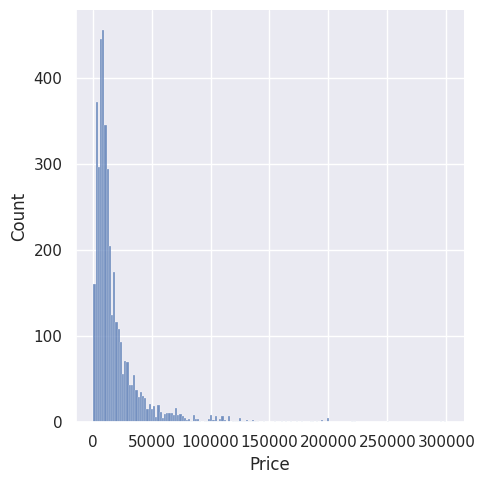

In [94]:
sns.displot(data_no_mv['Price']);

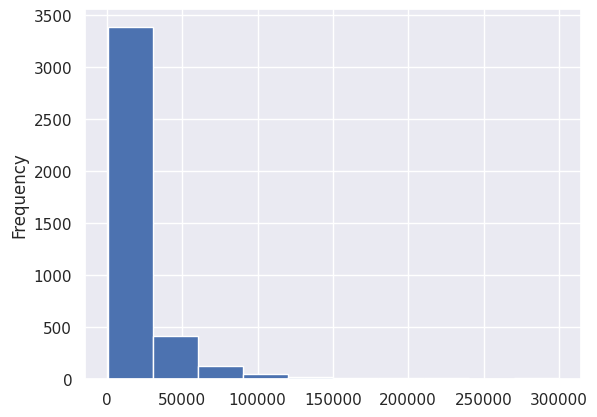

In [95]:
data_no_mv['Price'].plot(kind='hist');

#### Dealing with outliers

In [96]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.00,3984,3984.00,3984.00,3984,3984,3984.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.12,NaN,165.12,2.74,NaN,NaN,2006.29
std,NaN,18976.27,NaN,102.77,4.96,NaN,NaN,6.67
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6980.00,NaN,93.00,1.80,NaN,NaN,2002.75
50%,NaN,11400.00,NaN,160.00,2.20,NaN,NaN,2007.00
75%,NaN,21000.00,NaN,230.00,3.00,NaN,NaN,2011.00


/tmp/ipykernel_12046/3740952808.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price']);


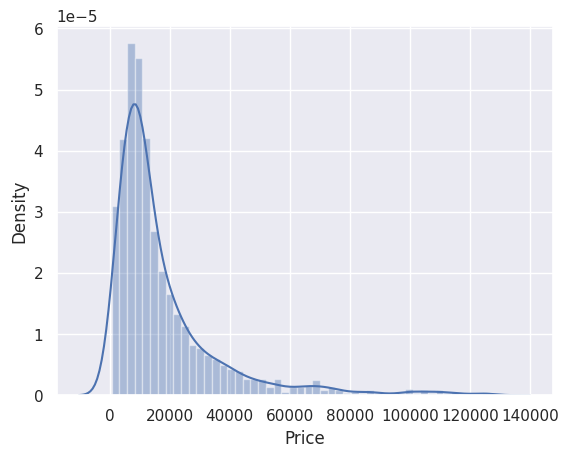

In [97]:
sns.distplot(data_1['Price']);

/tmp/ipykernel_12046/534165355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

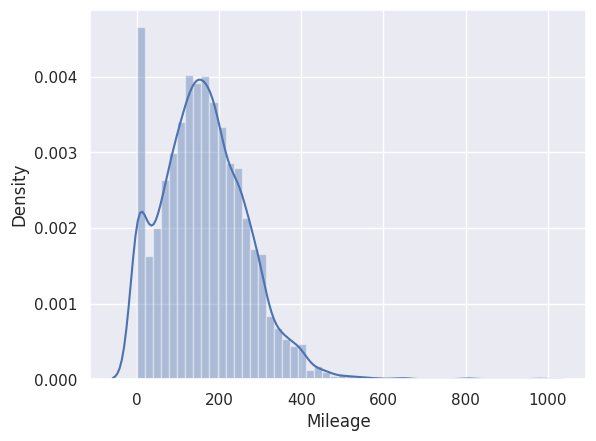

In [98]:
sns.distplot(data_no_mv['Mileage'])

/tmp/ipykernel_12046/2034858564.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

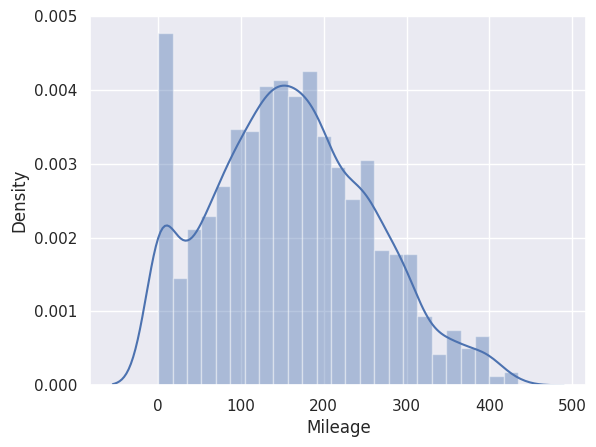

In [99]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
sns.distplot(data_2['Mileage'])

/tmp/ipykernel_12046/1571803318.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['EngineV']);


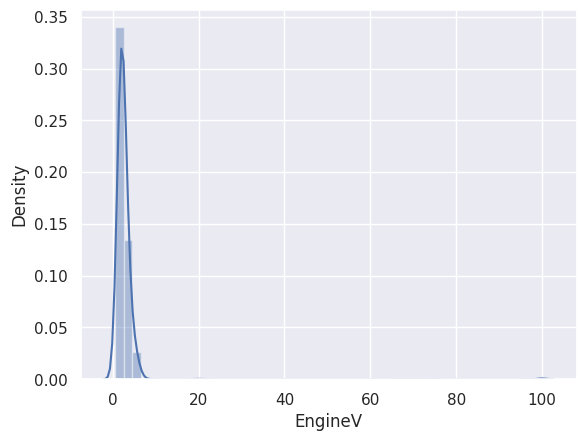

In [100]:
sns.distplot(data_no_mv['EngineV']);

/tmp/ipykernel_12046/3404246461.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

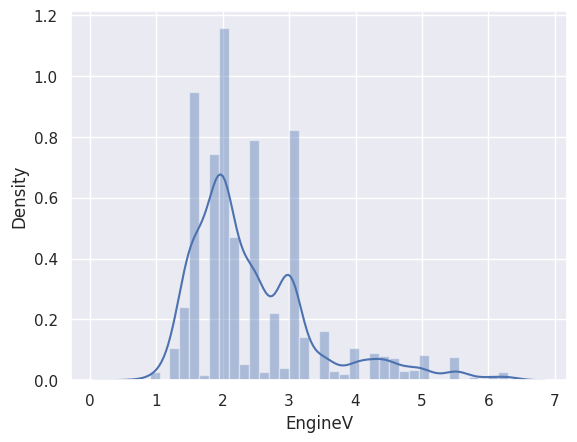

In [101]:
data_3 = data_2[data_2['EngineV']<6.5]
sns.distplot(data_3['EngineV'])

/tmp/ipykernel_12046/534082538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Year'])


<Axes: xlabel='Year', ylabel='Density'>

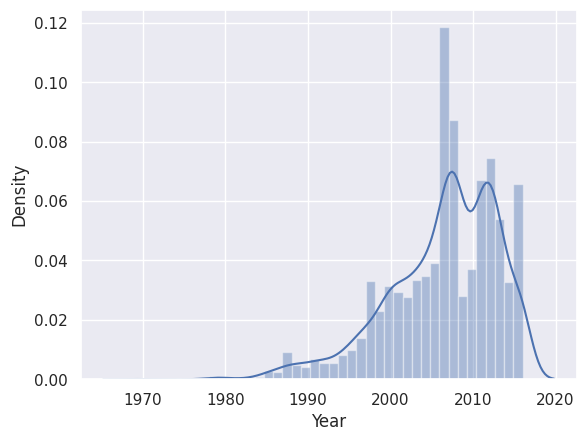

In [102]:
sns.distplot(data_no_mv['Year'])

/tmp/ipykernel_12046/3029883836.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

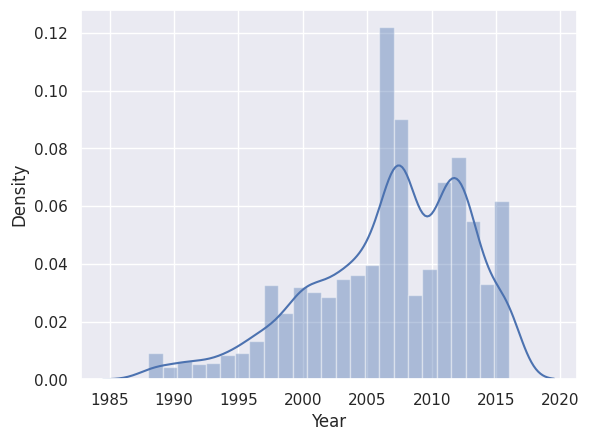

In [103]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
sns.distplot(data_4['Year'])

In [104]:
data_cleaned = data_4.reset_index(drop=True)

In [105]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


### Checking OLS Assumption

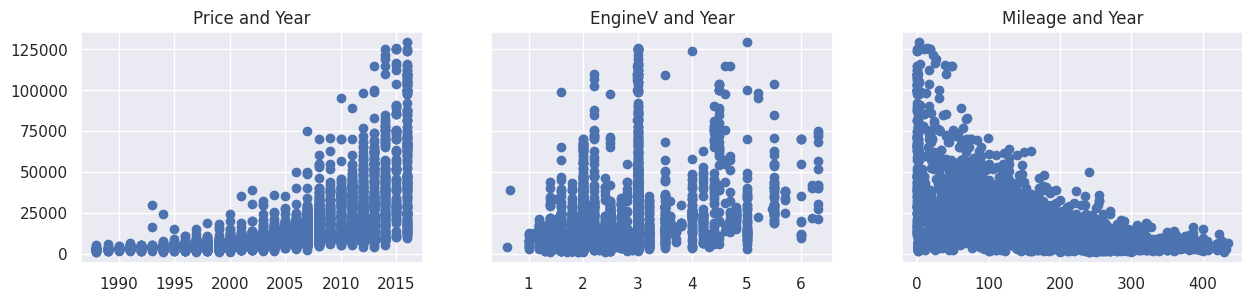

In [106]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('EngineV and Year')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Mileage and Year')

plt.show()

### Relaxing the assumptions
None of these patterns follows linear it more of exponential so we take log transformation to find the original pattern of the price variable

In [107]:
log_data = np.log(data_cleaned['Price'])
data_cleaned['Log_price'] = log_data
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81


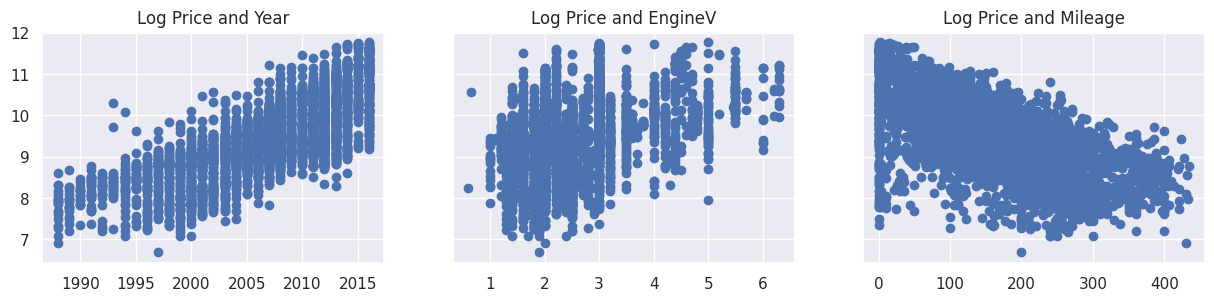

In [108]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

### Multicolinearity
It states that no independent variable should be related but we may get correlation between year and mileage

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [110]:
vif
# if vif = 1 then no multicolinearity
# if 1<vif < 6 then its acceptable
# if 6<vif then its unacceptable

,VIF,features
0,3.79,Mileage
1,10.35,Year
2,7.66,EngineV


In [111]:
# Here year has more than 10 vif so we are removing it 
data_no_multicolinearity = data_cleaned.drop(["Year"], axis=1)

In [112]:
data_no_multicolinearity

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,9.81
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.00,van,163,2.50,Diesel,yes,9.35
3863,Toyota,17900.00,sedan,35,1.60,Petrol,yes,9.79
3864,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,11.74
3865,BMW,6500.00,sedan,1,3.50,Petrol,yes,8.78


### Converting categorical variables to numeric

In [113]:
data_only_numeric = pd.get_dummies(data_no_multicolinearity, drop_first=True)
# Here we use drop_first = True becasue if all variables is get into one hot encoding it will introduce the multicolinearity

In [114]:
data_only_numeric.head()

,Price,Mileage,EngineV,Log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.00,277,2.00,8.34,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,7900.00,427,2.90,8.97,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,13300.00,358,5.00,9.50,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,23000.00,240,4.20,10.04,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,18300.00,120,2.00,9.81,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


### Rearranging the columns

In [115]:
data_only_numeric.columns

Index(['Price', 'Mileage', 'EngineV', 'Log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype='object')

In [116]:
cols = ['Log_price', 'Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [117]:
data_preprocessed = data_only_numeric[cols]
data_preprocessed.head()

,Log_price,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,4200.00,277,2.00,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.97,7900.00,427,2.90,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.50,13300.00,358,5.00,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.04,23000.00,240,4.20,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.81,18300.00,120,2.00,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


### Creating Linear Regression Model

#### Declaring feature and target variables

In [118]:
target = data_preprocessed['Log_price']
inputs = data_preprocessed.drop(['Log_price', 'Price'], axis=1)

#### Scale the input data

In [119]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

inputs_scaled = scaler.transform(inputs)

#### Train Test Split

In [120]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=42)

#### Creating a Linear Regression Model

In [121]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [122]:
y_hat = model.predict(x_train)

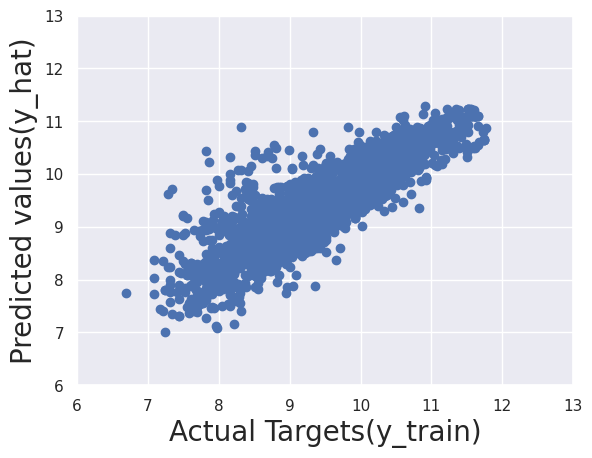

In [123]:
plt.scatter(y_train, y_hat)
plt.xlabel('Actual Targets(y_train)', size=20)
plt.ylabel('Predicted values(y_hat)', size=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

/tmp/ipykernel_12046/733282613.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residual Plot')

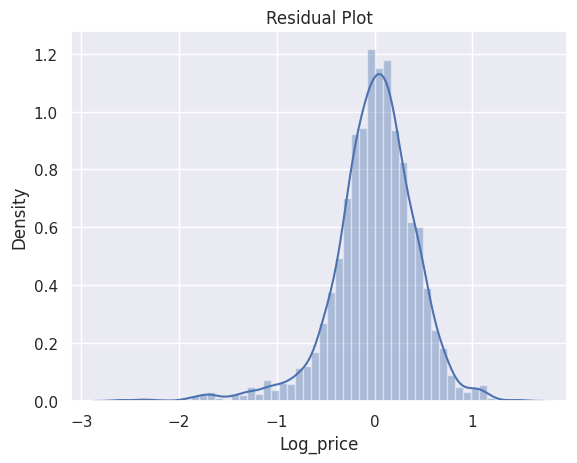

In [69]:
# Residual plot 
sns.distplot(y_train - y_hat)
plt.title('Residual Plot')
## From the graph observation the error absorbed between actual value and predicted value is normally distributed thus confirmed the normality and homoscedasticity

In [70]:
model.score(x_train, y_train)

0.7546487921881218

In [71]:
model.score(x_test,y_test)

0.7352752333232251

### Weights and Bias

In [72]:
model.intercept_

9.421003614148074

In [73]:
model.coef_

array([-0.46815598,  0.21526817,  0.01105151,  0.00569157, -0.14247174,
       -0.18769337, -0.06529696, -0.09898873, -0.13980763, -0.09384461,
       -0.17892753, -0.11457574, -0.15668036, -0.11685263, -0.02572253,
       -0.15106183,  0.31442123])

In [74]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = model.coef_
reg_summary

,Features,Weights
0,Mileage,-0.468156
1,EngineV,0.215268
2,Brand_BMW,0.011052
3,Brand_Mercedes-Benz,0.005692
4,Brand_Mitsubishi,-0.142472
5,Brand_Renault,-0.187693
6,Brand_Toyota,-0.065297
7,Brand_Volkswagen,-0.098989
8,Body_hatch,-0.139808
9,Body_other,-0.093845


In [75]:
data_no_multicolinearity['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

### Tessting 

In [76]:
y_hat_test = model.predict(x_test)

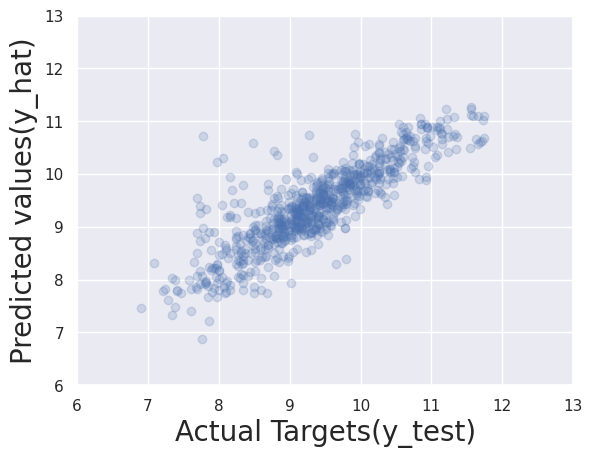

In [77]:
plt.scatter(y_test, y_hat_test,alpha=0.2)
plt.xlabel('Actual Targets(y_test)', size=20)
plt.ylabel('Predicted values(y_hat)', size=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [78]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head()

,Predictions
0,40419.308971
1,7956.895960
2,5757.284408
3,9765.810605
4,7027.363814


In [79]:
y_test_new = y_test.reset_index(drop=True)
y_test_new

0       9.966462
1       9.093807
2       8.086410
3       9.392662
4       8.594154
         ...    
769     8.342840
770     9.082507
771     8.486734
772    10.203592
773     9.296518
Name: Log_price, Length: 774, dtype: float64

In [80]:
df_pf['Targets'] = np.exp(y_test_new)
df_pf

,Predictions,Targets
0,40419.308971,21300.0
1,7956.895960,8900.0
2,5757.284408,3250.0
3,9765.810605,12000.0
4,7027.363814,5400.0
...,...,...
769,4699.586013,4200.0
770,9123.067372,8800.0
771,6267.803094,4850.0
772,20906.128600,27000.0


In [81]:
df_pf['Residual'] = df_pf['Targets'] - df_pf['Predictions']
df_pf['Diff_percent'] = np.absolute(df_pf['Residual']/df_pf['Targets'] * 100)
df_pf

,Predictions,Targets,Residual,Diff_percent
0,40419.308971,21300.0,-19119.308971,89.762014
1,7956.895960,8900.0,943.104040,10.596675
2,5757.284408,3250.0,-2507.284408,77.147213
3,9765.810605,12000.0,2234.189395,18.618245
4,7027.363814,5400.0,-1627.363814,30.136367
...,...,...,...,...
769,4699.586013,4200.0,-499.586013,11.894905
770,9123.067372,8800.0,-323.067372,3.671220
771,6267.803094,4850.0,-1417.803094,29.233053
772,20906.128600,27000.0,6093.871400,22.569894


In [82]:
df_pf.describe(include='all')

,Predictions,Targets,Residual,Diff_percent
count,774.000000,774.000000,774.000000,774.000000
mean,16113.011638,17799.988992,1686.977355,42.085282
std,13326.229797,19723.434542,11192.614496,96.169928
min,967.030415,999.000000,-42859.020603,0.020246
25%,7467.591694,6700.000000,-2246.354353,11.024941
50%,11914.358989,11050.000000,-38.697776,24.086183
75%,20249.505640,20475.000000,3004.524837,42.381716
max,79026.348020,125000.000000,81051.158885,1785.792525


In [83]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' %x)
df_pf.sort_values(by=['Diff_percent'])

,Predictions,Targets,Residual,Diff_percent
387,13602.75,13600.00,-2.75,0.02
74,28889.06,28900.00,10.94,0.04
314,35530.21,35500.00,-30.21,0.09
336,11313.27,11300.00,-13.27,0.12
425,2995.68,3000.00,4.32,0.14
262,52180.11,52055.25,-124.86,0.24
674,3107.51,3100.00,-7.51,0.24
648,9675.57,9700.00,24.43,0.25
79,21407.59,21335.00,-72.59,0.34
313,9865.72,9900.00,34.28,0.35
